<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [55]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

1)

In [56]:
#separar conjuntos de entrenamiento y testeo
y=df['diagnosis']
X=df.drop(['id', 'diagnosis'], axis=1)

In [58]:
#Normalización de los datos.
scaler=StandardScaler()
scaler.fit(X)
x_scaler=scaler.transform(X)
x_scaler= pd.DataFrame(data=x_scaler, columns=X.columns)
x_scaler

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


2)

<AxesSubplot:>

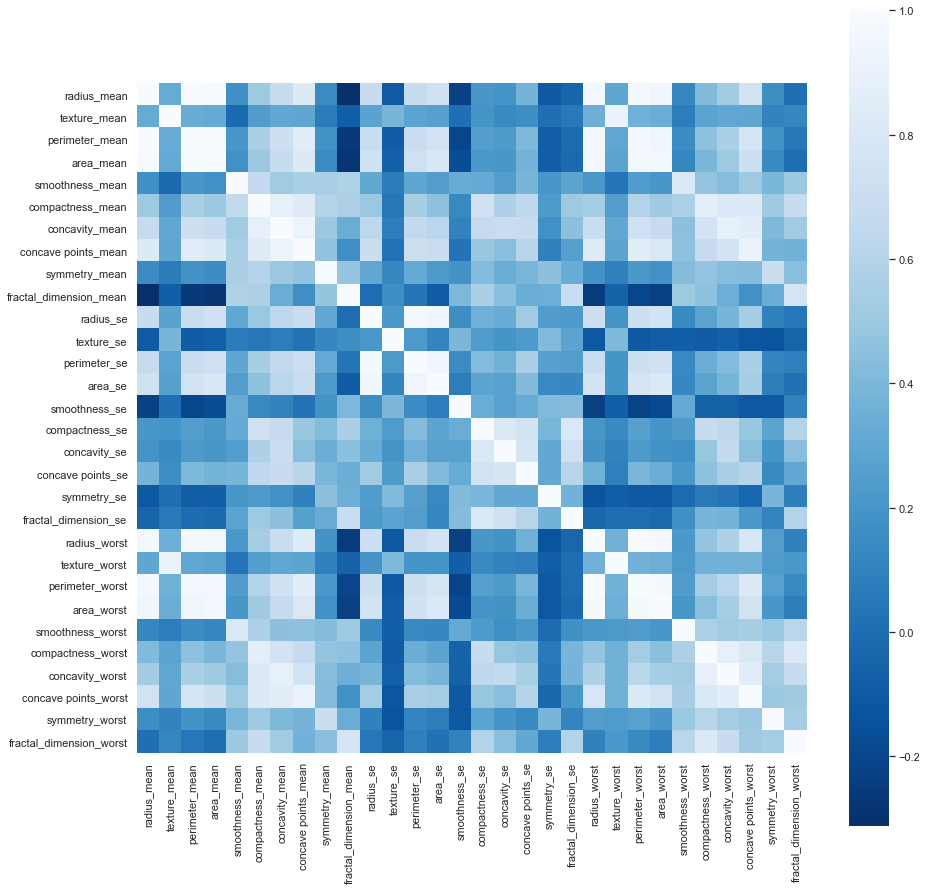

In [59]:
#Matriz de correlación
correlacion=x_scaler.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlacion, cmap='Blues_r', annot=False, square=True)

Podemos ver de esto la correlación que hay entre las distintas variables, por ejemplo las variables: radius_mean, texture_mean perimeter_mean y area_mean estan altamente correlacionadas mientras que para radius_worst y radius_se se tiee lo contrario.

3)

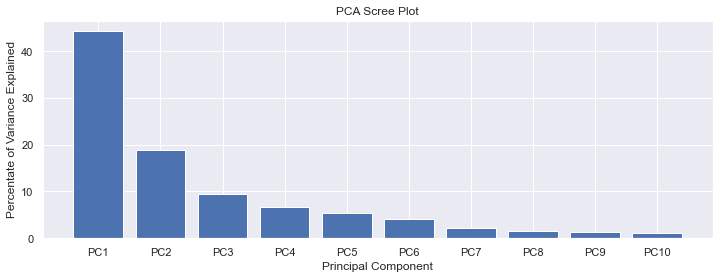

In [60]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_scaler)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= np.arange(10), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

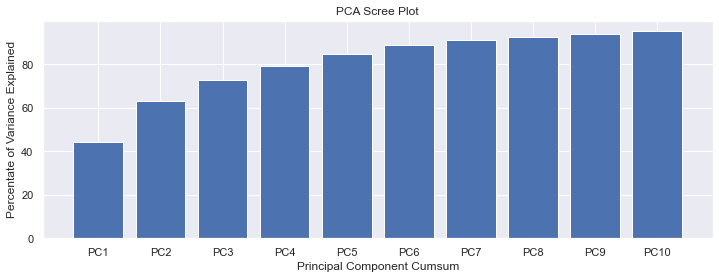

84.72999999999999


In [64]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= np.arange(10), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Vemos que la varianza explicada de las variables se puede explicar en 84.73% considerando solo las 5 primeras componentes principales. 

4)

In [65]:
#tranformamos nuestro x_train_scaler a componentes principales
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(x_scaler)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
targetDataframe = y

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,diagnosis
0,9.192837,1.948583,-1.123166,3.633732,-1.195108,1
1,2.387802,-3.768172,-0.529293,1.118262,0.621775,1
2,5.733896,-1.075174,-0.551748,0.912085,-0.177086,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960882,1
4,3.935302,-1.948072,1.389767,2.940640,0.546745,1


5)

In [72]:
#Separar conjunto de testeo y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(principalDataframe, targetDataframe, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

In [78]:
#Modelo Regresión logistica
from sklearn.linear_model import LogisticRegression
from metrics_classification import *
model_1 =  LogisticRegression()
model_1.fit(X_train,Y_train)
y_true =  list(Y_test)
y_pred = list(model_1.predict(X_test))
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics_1 = summary_metrics(df_temp)
print('Metricas Regresión logistica')
df_metrics_1

Metricas Regresión logistica


,accuracy,recall,precision,fscore
0,0.94,0.9351,0.9417,0.938


In [79]:
#Modelo SVC
from sklearn.svm import SVC
model_2 =  SVC(gamma=2, C=1)
model_2.fit(X_train,Y_train)
y_true =  list(Y_test)
y_pred = list(model_2.predict(X_test))
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics_2 = summary_metrics(df_temp)
print('Metricas SVC')
df_metrics_2

Metricas SVC


,accuracy,recall,precision,fscore
0,0.59,0.5119,0.7929,0.3927


In [80]:
#Modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_3 =  DecisionTreeClassifier(max_depth=5)
model_3.fit(X_train,Y_train)
y_true =  list(Y_test)
y_pred = list(model_3.predict(X_test))
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics_3 = summary_metrics(df_temp)
print('Metricas Decision Tree Classifier')
df_metrics_3

Metricas Decision Tree Classifier


,accuracy,recall,precision,fscore
0,0.91,0.9126,0.9061,0.9085


De estos 3 modelos modelos se puede apreciar que el que mejor se adapta es el de regresión logistica, posteriormente el Decision Tree Classifier y el peor seria el SVC.